# 비지도학습에 대해 알아보자

지금까지 한 작업들은 무언가(X)를 분류해서 정답(y)를 맞추는 지도학습(Supervised Learning)을 진행했는데 명확한 label이 없는 데이터들의 정답을 맞추는 비지도학습(Unsupervised Learning)에 대해 알아보자.

1. 비지도학습
2. 클러스터링 K-means
3. 클러스터링 DBSCAN
4. 차원 축소 PCA
5. 차원 축소 T-SNE

## 비지도학습

비지도학습은 위에서 말했듯이 label이 없는데 어떻게 유추할까? 데이터셋의 특징(feature)과 패턴을 기반으로 스스로가 판단한다. 분류(classification) 문제를 예를들어서 살펴보자.   
고양이와 강아지를 판단하는 신경망 분류 모델을 학습시킬때 고양이와 강아지를 나눠주는 label이 필요했다. 하지만 이렇게 라벨링 해주는것은 사람이 보고 일일이 적어줘야하는 불편함이 있다. 그래서 이 문제를 해결하기 위해 고양이와 강아지를 라벨링하지 않고, 비슷한 특징과 패턴을 가진 데이터끼리 군집화(클러스터링, clustering)한 후 어떤 군집인지 추론하는 방식을 사용한다.   
비지도학습이란 위에서 말한 군집화 외에 차원 축소(dimensionality reduction) 및 데이터 시각화, 생성모델(generative model)등 다양한 task를 포괄하는 개념이다.

## 클러스터링 K-means

군집화를 통해서 유사한 데이터끼리 묶어준다고 했는데, 무엇을 기준으로 묶어줄까? 쉽게 생각하면 k개를 기준으로 그룹으로 묶는것이다.

In [ ]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10]) # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10]) # 10개의 점들이 각각 대응하는 중심점(label) 값

임의로 지정한 k개의 중심점에 새로운 label 역할을 하는것이 K-means이다.

In [ ]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

사이킷런의 make_blob()을 활용해서 중심점이 5개인 무작위 점 100개를 생성했다. 5개의 군집을 만든것처럼 보이는데 K-means 알고리즘을 적용시켜보자.

K-means 알고리즘의 순서도
> 1. 원하는 클러스터의 수(K) 결정
2. 무작위로 K개의 중심점(centroid) 선정
3. 나머지 점들과 모든 중심점과 유클리드 거리(L2 Distance)를 계산후 가장 가까운 거리의 클러스터를 중심점의 클러스터에 속하게 한다.
4. K개 클러스터의 중심점을 재조정한다. 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터의 다음 중심점이 된다.
5. 재조정된 중심점을 바탕으로 유클리드 거리 계산 후 가장 가까운 거리의 클러스터 선정한다.
6. 4~5번을 반복한다. 반복 횟수는 사용자가 조절하고 특정 iteration이 되면 수렴하게 된다.

In [ ]:
from sklearn.cluster import KMeans

# 1, 2번 과정 
kmeans_cluster = KMeans(n_clusters=5)

# 3~6 과정이 전부 함축되어 있는 코드이다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

In [ ]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 시각화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

이렇게 분류하는게 완벽한게 아니다. 원형 분포나 달 모양 분포, 대각선 모양 분포는 제대로 군집화가이루어지지 않는다. 또한 군집의 개수를 미리 지정해야해서 이 것을 모르면 사용하기 어렵다. 유클리드 거리가 멀면서 연관되어 있는 데이터들도 군집화가 어렵다.

In [ ]:
# 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) # 대각선 분포를 가지는 무작위 데이터 100개 선언
transformation = [[0.6, -0.6], [-0.4, 0.8]] # 대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) # 무작위 분포의 점 데이터를 대각선 분포로 변환

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

## 클러스터링 DBSCAN

DBSCAN(Density Based Spatial Clustering of Applications with Noise) 알고리즘은 밀도(density) 기반 군집 알고리즘이다. 큰 특징으로는 군집의 개수를 지정할 필요가 없다.   
[DBSCAN visualization](http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN))   

DBSCAN의 변수와 용어가 있으므로 한번 짚고 가자 그리고 epsilon과 minPts값을 미리 지정해주어야한다.   
- epsilon: 클러스터의 반경
- minPts: 클러스터를 이루는 개체의 최솟값
- core point: 반경 epsilon 내에 minPts개 이상의 점이 존재하는 중심점
- border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
- noise point: 군집에 포함되지 못하는 점

> 1. 임의의 점 p를 설정하고, p 포함 지정해준 클러스터의 반경 안에 포함된 점들의 개수를 센다.
2. 해당 원에 minPts 이상의 점이 포함되어 있으면 해당 점 p를 core point로 간주하고 포함된 점들을 하나의 클러스터로 묶는다.
3. 만약 해당 점에 minPts보다 적은 점이 포함되어 있으면 pass한다.
4. 모든 점에 1~3번의 과정을 반복하면서 p'가 core point가 되고 이 점이 기존의 core point에 속하면 하나의 클러스터로 묶어준다.
5. 모든 점에 클러스터링 과정을 끝냈는데 아무것도 속하지 않는 점은 noise point로 간주하고, 특정 군집에는 속하지만 core point가 아닌 점들은 border point라고 칭한다.

In [1]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

NameError: name 'plt' is not defined

K-means와 DBSCAN 알고리즘의 수행 시간을 비교해보면 다음과 같이 나온다.   
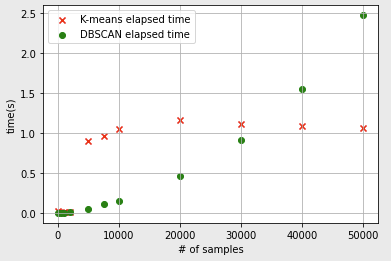   
해석해보면 데이터의 수가 적으면 K-means의 소요 시간이 길지만 데이터의 수가 많아도 소요 시간이 일직선인걸 볼 수 있다. 반대로 DBSCAN은 데이터의 수가 적으면 소요 시간이 매우 적지만 데이터의 수가 많으면 급격하게 늘어나는 모습을 볼 수 있다.   
> 알고리즘 복잡도로 봤을 때 K-means는 $O(n)$, DBSCAN은 $O(n^2)$로 판단된다.

## 차원 축소 PCA

비지도학습의 대표적인 방법 중 하나로 주성분분석(PCA)이라는 차원 축소(Dimensionality reduction) 알고리즘이 있다.   
차원 축소는 비지도학습에서 데이터를 나타내는 여러 feature들중 가장 잘 표현하는 특징 추출(feature extrraction) 용도로 사용된다. 그렇다면 PCA는 무엇일까?   
> 데이터 분포의 주성분을 찾아주는 방법이다. 여기서 주성분은 데이터 분산이 가장 큰 방향 벡터를 의미한다.
데이터들의 분산을 최대로 보존하면서, 서로 직교(orthogonal)하는 기저(basis; 분산이 큰 방향벡터의 축)를 찾아 고차원 공간을 저차원으로 projection한다.
기존 feature중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합하는 방식이다.


![](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)   
위의 그림을 보면 데이터가 우상향 방향의 X성분과 Y성분으로 나뉘어서 표현된다. 저기서 긴 화살표와 짧은 화살표 방향을 X', Y' 좌표축으로 삼으면 어떻게 될까? 이렇게 새로운 좌표 역할을 할 수 있는 벡터의 모음을 기저(basis)라고 한다.

![](https://media.geeksforgeeks.org/wp-content/uploads/Dimensionality_Reduction_1.jpg)   
이렇게 차원을 축소하면서 projection하면 정보의 손실을 최소화하면서 데이터의 분포도를 잘 표현할 수 있는 장점을 갖고 있다. PCA는 차원축소를 시도하되 분산이 가장 길게 나오는 기저 방향을 찾아서 그 방향의 축을 남기고 덜 중요한 축을 삭제하는 방식으로 진행된다. 이렇게 찾은 가장 중요한 기저를 주성분(Principal Component방향, pc축 이라고 한다.
코드를 통해 확인해보자

In [ ]:
# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

In [ ]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [ ]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다
clf_orig.fit(train_df, train_y)

In [ ]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

단 2개의 주성분 feature만으로 PCA classifier의 정확도가 30개 feature를 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여준다.   
모든걸 사용한 방식이 정확도가 낮은 이유는 분류를 방해하는 feature도 사용했기 때문에 정확도가 낮게 나왔다.   
__PCA는 각 feature간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법이다__

## 차원 축소 T-SNE

T-SNE(T-Stochasic Neighber Embedding)이라는 시각화에 많이 쓰이는 알고리즘이다. 